In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data cleaning and analysis

In [2]:
df = pd.read_csv("population/country.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Code            239 non-null    object 
 1   Name            239 non-null    object 
 2   Continent       239 non-null    object 
 3   Region          239 non-null    object 
 4   SurfaceArea     239 non-null    float64
 5   IndepYear       192 non-null    float64
 6   Population      239 non-null    int64  
 7   LifeExpectancy  222 non-null    float64
 8   GNP             239 non-null    float64
 9   GNPOld          178 non-null    float64
 10  LocalName       239 non-null    object 
 11  GovernmentForm  239 non-null    object 
 12  HeadOfState     236 non-null    object 
 13  Capital         232 non-null    float64
 14  Code2           238 non-null    object 
dtypes: float64(6), int64(1), object(8)
memory usage: 28.1+ KB


In [79]:
df.head(20)

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,HeadOfState,Capital,Code2
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos,56.0,AO
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani,34.0,AL
7,ARE,United Arab Emirates,Asia,Middle East,83600.0,1971.0,2441000,74.1,37966.0,36846.0,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan,65.0,AE
8,ARG,Argentina,South America,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rúa,69.0,AR
9,ARM,Armenia,Asia,Middle East,29800.0,1991.0,3520000,66.4,1813.0,1627.0,Hajastan,Republic,Robert Kotšarjan,126.0,AM
13,ATG,Antigua and Barbuda,North America,Caribbean,442.0,1981.0,68000,70.5,612.0,584.0,Antigua and Barbuda,Constitutional Monarchy,Elisabeth II,63.0,AG
14,AUS,Australia,Oceania,Australia and New Zealand,7741220.0,1901.0,18886000,79.8,351182.0,392911.0,Australia,"Constitutional Monarchy, Federation",Elisabeth II,135.0,AU
15,AUT,Austria,Europe,Western Europe,83859.0,1918.0,8091800,77.7,211860.0,206025.0,Österreich,Federal Republic,Thomas Klestil,1523.0,AT
16,AZE,Azerbaijan,Asia,Middle East,86600.0,1991.0,7734000,62.9,4127.0,4100.0,Azärbaycan,Federal Republic,Heydär Äliyev,144.0,AZ
17,BDI,Burundi,Africa,Eastern Africa,27834.0,1962.0,6695000,46.2,903.0,982.0,Burundi/Uburundi,Republic,Pierre Buyoya,552.0,BI


In [93]:
df['IndepYear'] = df['IndepYear'].abs()


In [5]:
df.isnull().sum()

Code               0
Name               0
Continent          0
Region             0
SurfaceArea        0
IndepYear         47
Population         0
LifeExpectancy    17
GNP                0
GNPOld            61
LocalName          0
GovernmentForm     0
HeadOfState        3
Capital            7
Code2              1
dtype: int64

In [6]:
df.dropna(inplace = True)

In [35]:
df.describe()

,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,Capital
count,1.660000e+02,166.000000,1.660000e+02,166.000000,1.660000e+02,1.660000e+02,166.000000
mean,7.681021e+05,1840.445783,3.565948e+07,65.325301,1.749267e+05,1.761016e+05,2042.072289
std,2.046542e+06,442.010894,1.299403e+08,11.777465,7.602706e+05,7.449815e+05,1182.316712
min,1.600000e+02,-1523.000000,3.230000e+04,37.200000,1.410000e+02,1.570000e+02,5.000000
25%,3.441950e+04,1903.500000,2.602750e+06,56.725000,2.374000e+03,2.311000e+03,904.250000
50%,1.634375e+05,1959.000000,7.692000e+06,69.250000,9.275000e+03,9.237500e+03,2435.500000
75%,5.731502e+05,1970.000000,2.225300e+07,74.325000,7.201500e+04,7.573925e+04,3137.750000
max,1.707540e+07,1993.000000,1.277558e+09,80.700000,8.510700e+06,8.110900e+06,4068.000000


In [24]:
df[df['Population']>120030][["Name",'Population']].head()

,Name,Population
2,Angola,12878000
4,Albania,3401200
7,United Arab Emirates,2441000
8,Argentina,37032000
9,Armenia,3520000


In [27]:
top10 = df.nlargest(10, 'Population')[['Name', 'Population']]
print(top10)
plt.

                   Name  Population
41                China  1277558000
99                India  1013662000
223       United States   278357000
98            Indonesia   212107000
30               Brazil   170115000
164            Pakistan   156483000
181  Russian Federation   146934000
21           Bangladesh   129155000
109               Japan   126714000
155             Nigeria   111506000


### VISUALISATION

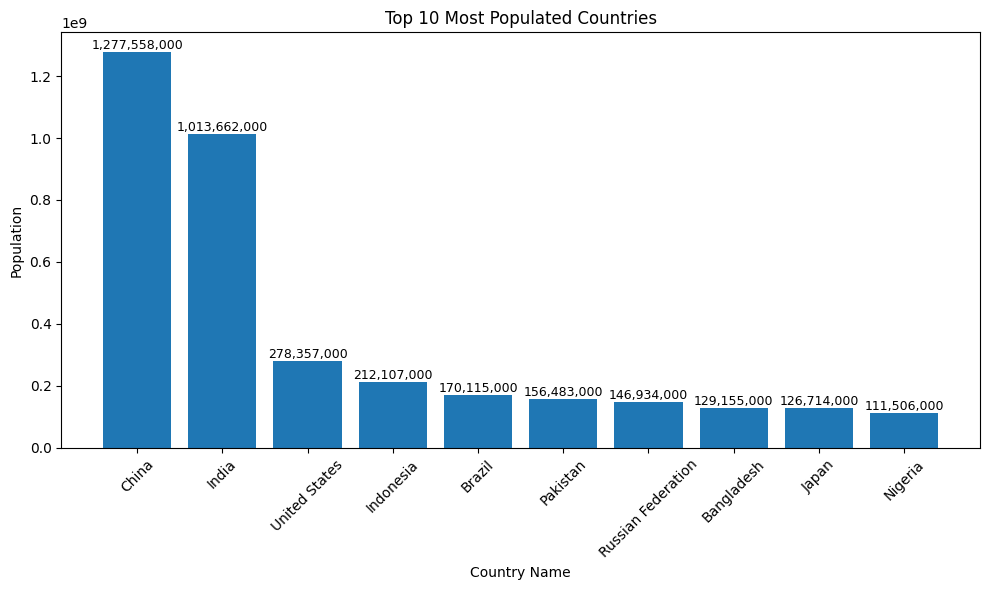

In [34]:

top10 = df.sort_values(by = 'Population', ascending = False).head(10)[['Name', 'Population']]

plt.figure(figsize=(10, 6))
plt.bar(top10['Name'], top10['Population'])

plt.xlabel('Country Name')
plt.ylabel('Population')
plt.title('Top 10 Most Populated Countries')

plt.xticks(rotation=45)

for i, val in enumerate(top10['Population']):
    plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()


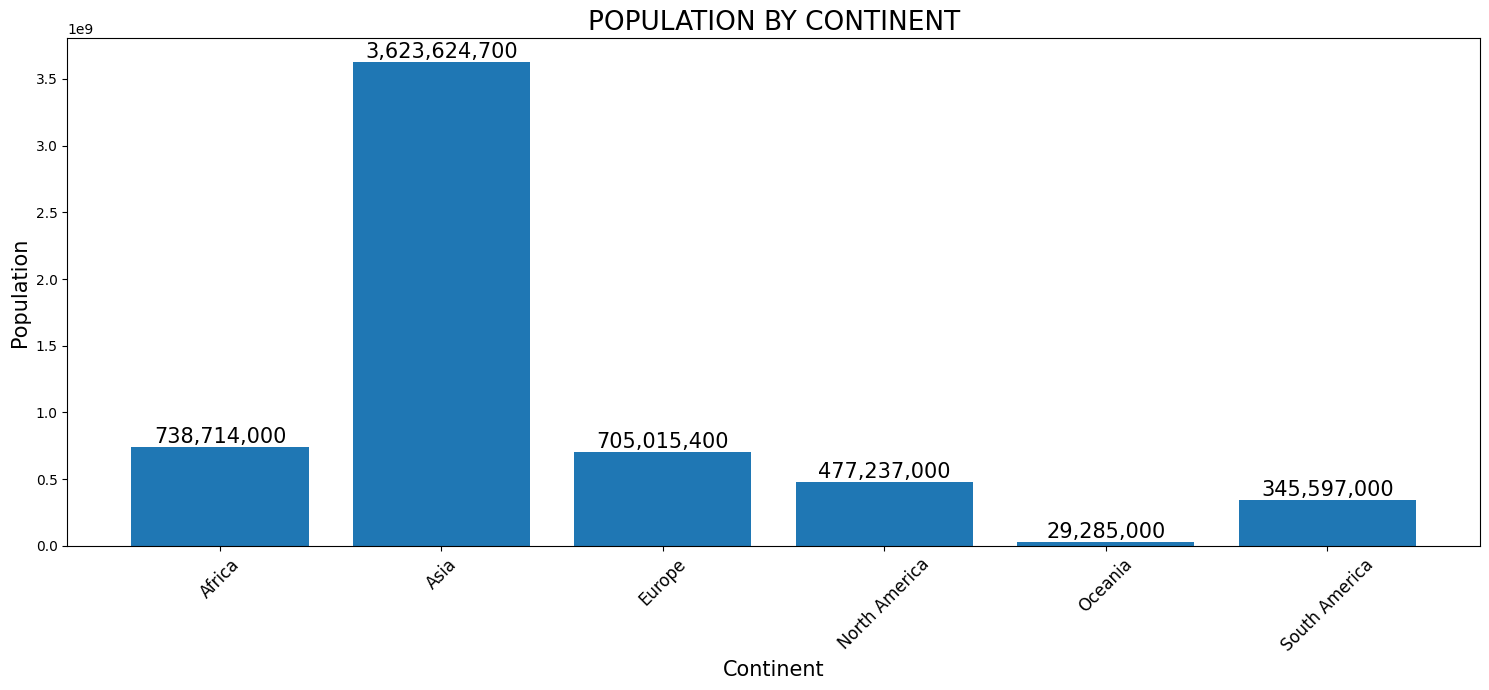

In [63]:
df1 = df.groupby('Continent')['Population'].sum().reset_index()
plt.figure(figsize=(15,7))
plt.bar(df1['Continent'], df1['Population'])
for i, val in enumerate(df1['Population']):
    plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=15)
plt.xlabel('Continent', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.title('POPULATION BY CONTINENT', fontsize=19)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

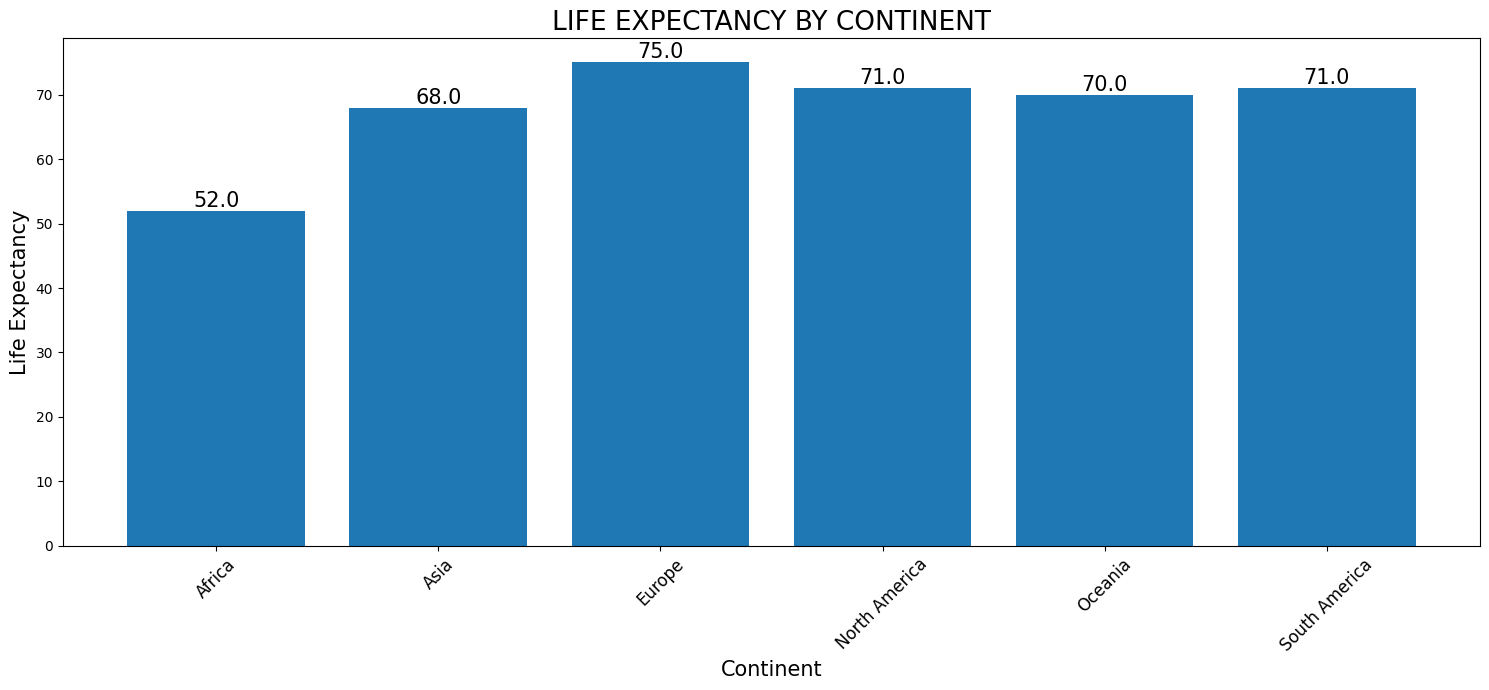

In [70]:
df4 = df.groupby('Continent')['LifeExpectancy'].mean().round().reset_index()
plt.figure(figsize=(15,7))
plt.bar(df4['Continent'], df4['LifeExpectancy'])
plt.xticks(rotation = 45, fontsize=12)

for i, val in enumerate(df4['LifeExpectancy']):
     plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=15)

plt.xlabel('Continent', fontsize=15)
plt.ylabel('Life Expectancy', fontsize=15)
plt.title('LIFE EXPECTANCY BY CONTINENT', fontsize=19)

plt.tight_layout()
plt.show()

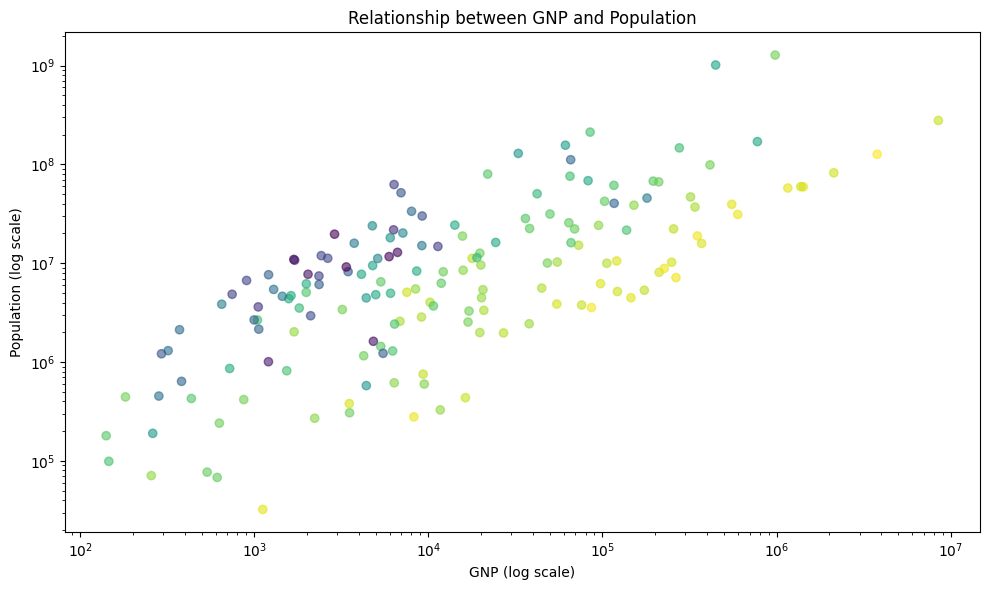

In [90]:
plt.figure(figsize=(10,6))
plt.scatter(df['GNP'], df['Population'], c=df['LifeExpectancy'], alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('GNP (log scale)')
plt.ylabel('Population (log scale)')
plt.title('Relationship between GNP and Population')
plt.tight_layout()
plt.show()


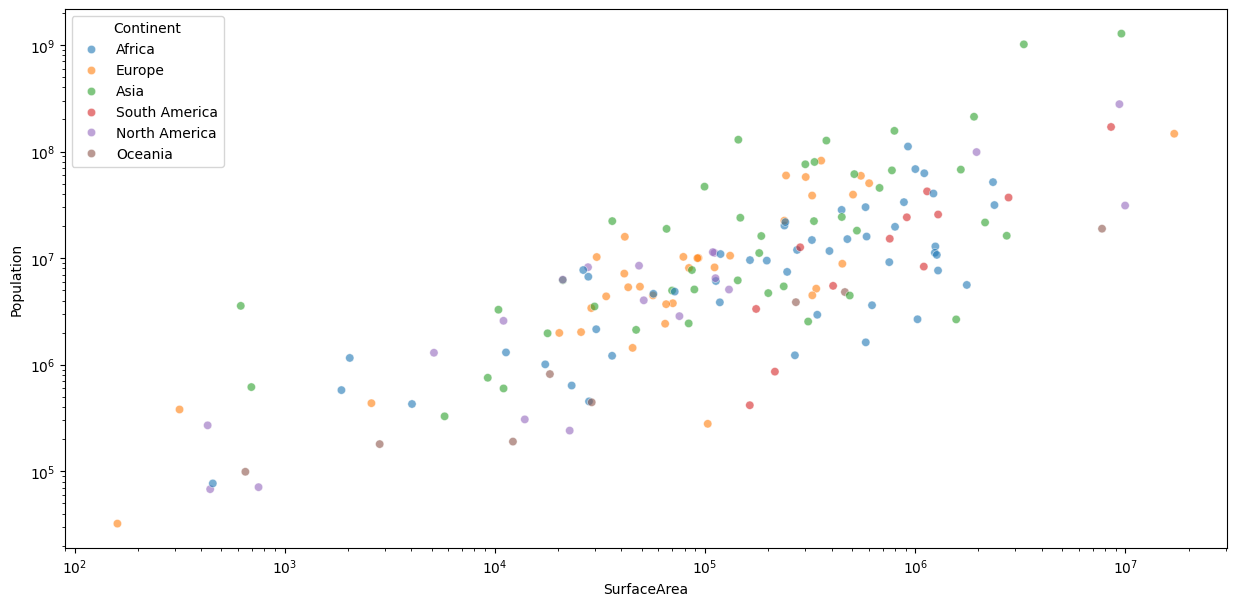

In [89]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='SurfaceArea', y='Population', hue='Continent', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.show()


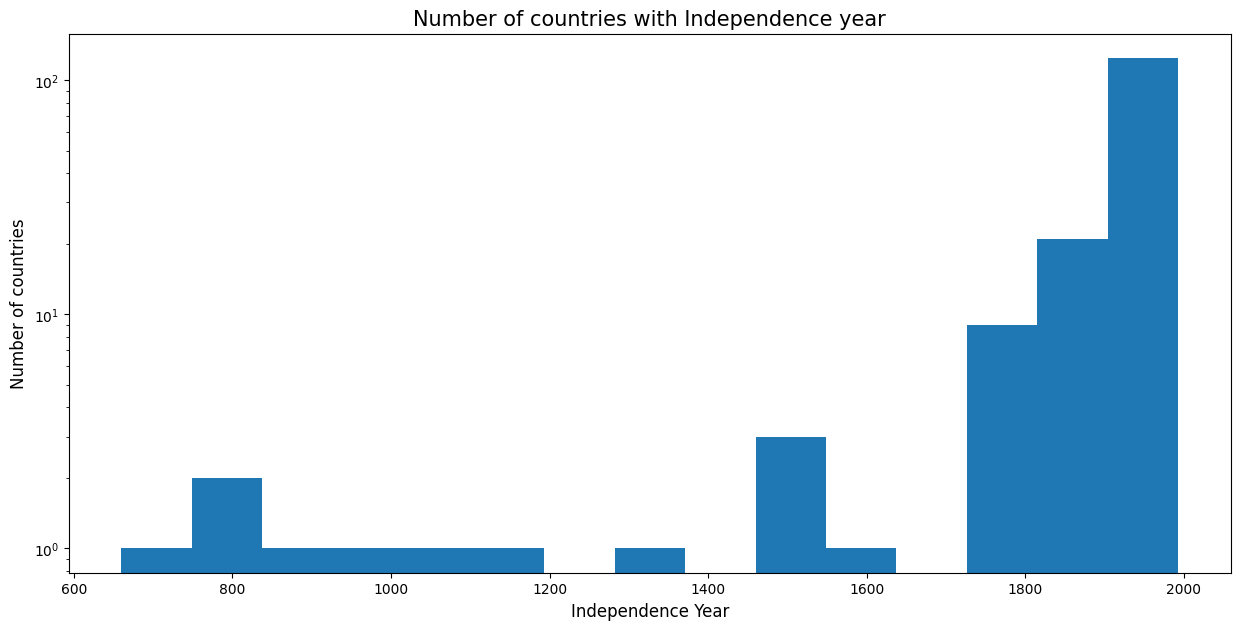

In [107]:
plt.figure(figsize=(15,7))
plt.hist(df['IndepYear'], bins=15)

plt.yscale('log')
plt.xlabel('Independence Year', fontsize=(12))
plt.ylabel('Number of countries', fontsize=(12))
plt.title('Number of countries with Independence year', fontsize=(15))
plt.show()

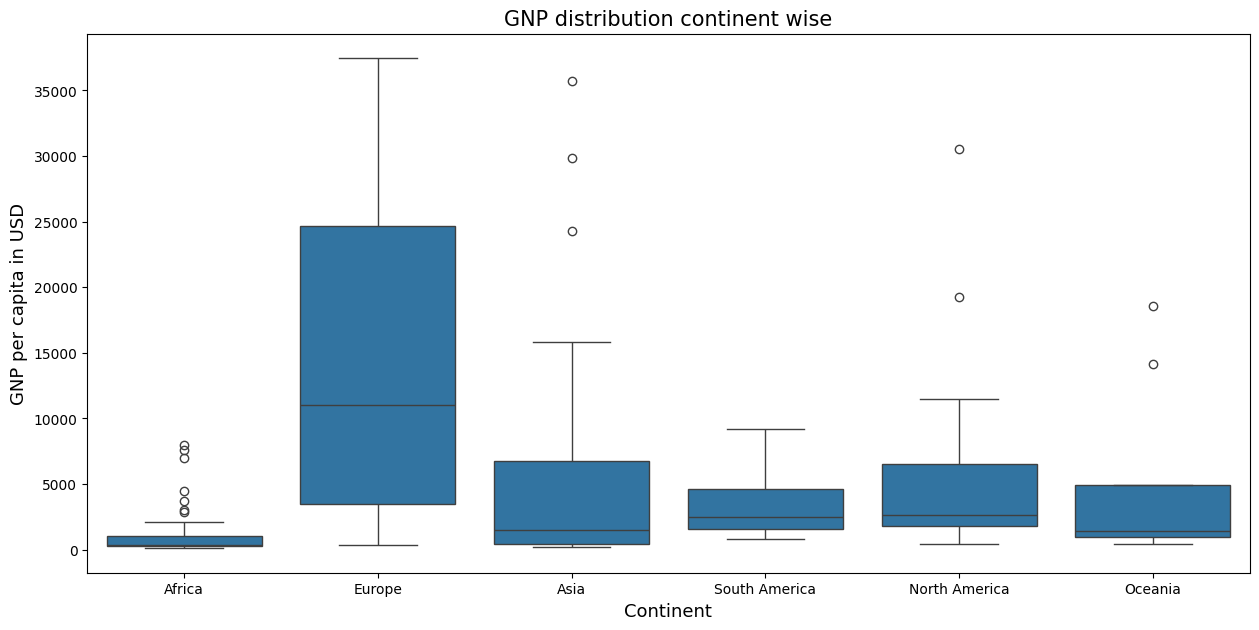

In [128]:
df['GNP_per_capita'] = df['GNP'] * 1000000 / df['Population']
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='Continent', y='GNP_per_capita')
plt.xlabel('Continent', fontsize=(13))
plt.ylabel('GNP per capita in USD', fontsize=(13))
plt.title('GNP distribution continent wise', fontsize=(15))

plt.show()

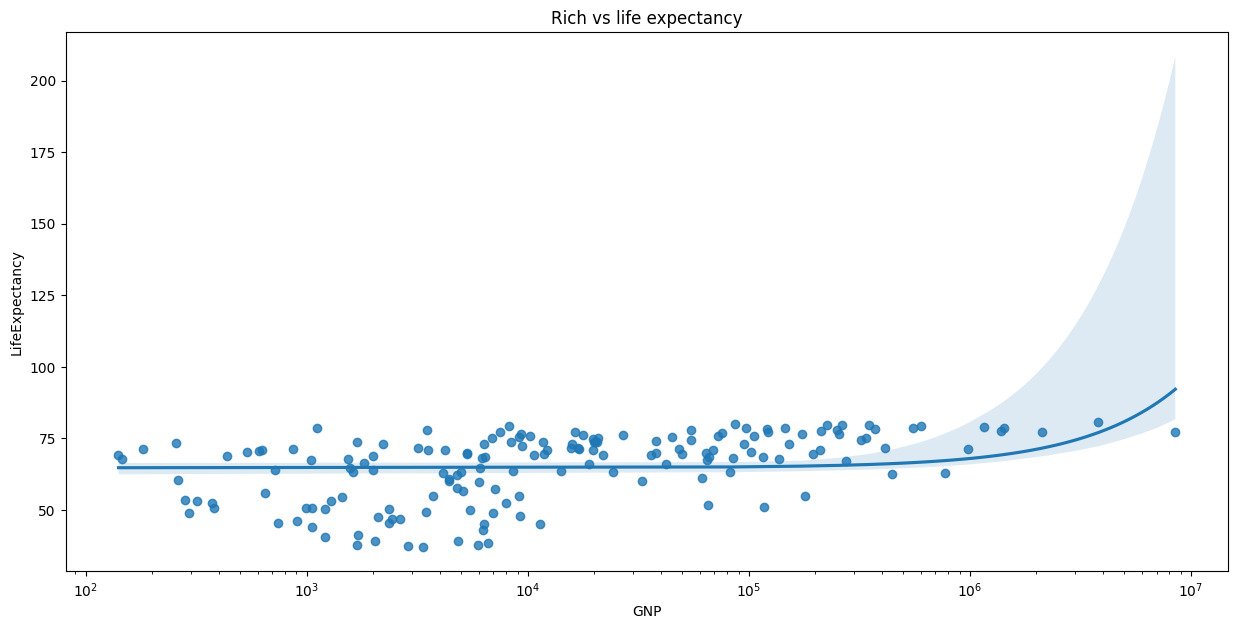

In [127]:
plt.figure(figsize=(15,7))
sns.regplot(data=df, x="GNP", y="LifeExpectancy")
plt.xscale('log')
plt.title("Rich vs life expectancy")
plt.show()

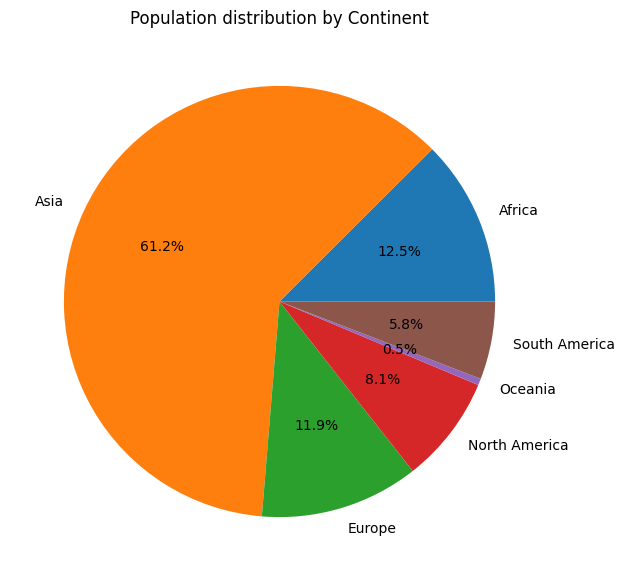

In [144]:
plt.figure(figsize=(15,7))
df5 = df.groupby('Continent')['Population'].sum().reset_index()
plt.pie(df5['Population'], labels=df5['Continent'], autopct='%1.1f%%' )
plt.title("Population distribution by Continent")
plt.show()

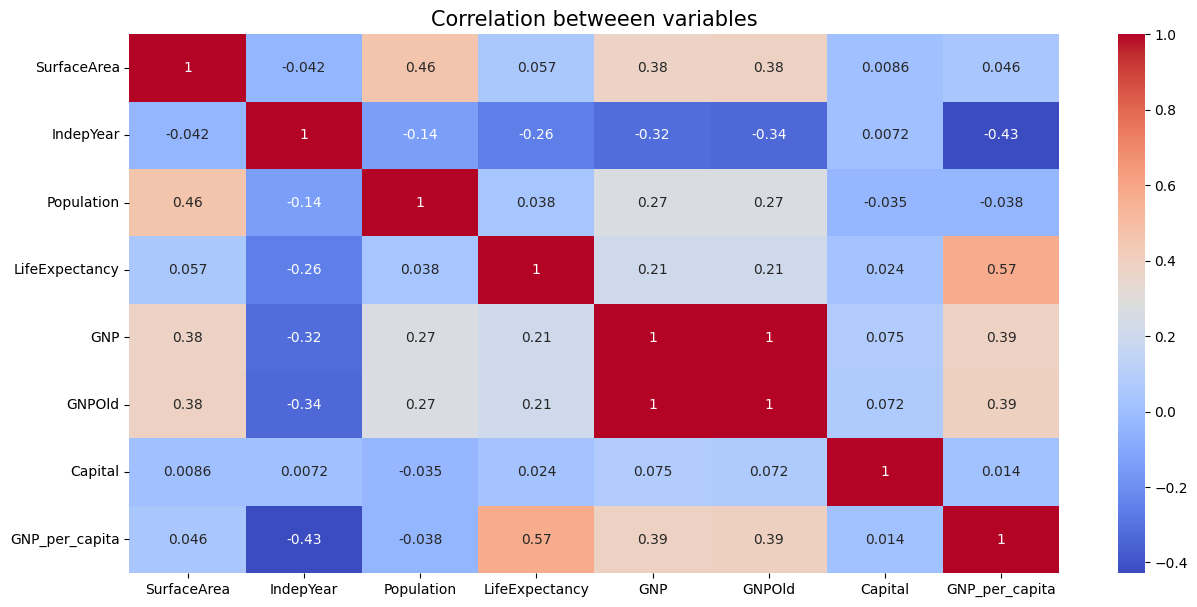

In [149]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation betweeen variables", fontsize=(15))
plt.show()